## Muat Dataset

### Subtask:
Memuat dataset 'penguins_size.csv' ke dalam DataFrame pandas.


In [1]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


## Inspeksi Data Awal

### Subtask:
Melakukan inspeksi awal terhadap DataFrame untuk memahami struktur data, kolom yang tersedia, tipe data, dan nilai yang hilang.


In [2]:
print(f"Bentuk DataFrame: {df.shape}")
print("\nInfo DataFrame:")
df.info()
print("\nNilai yang hilang per kolom:")
print(df.isnull().sum())

Bentuk DataFrame: (344, 7)

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

Nilai yang hilang per kolom:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


## Tangani Nilai yang Hilang

### Subtask:
Mengidentifikasi dan menangani nilai-nilai yang hilang (missing values) dalam dataset, misalnya dengan imputasi (mengisi dengan nilai rata-rata, median, atau modus) atau penghapusan baris/kolom.


In [3]:
for col in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    df[col] = df[col].fillna(df[col].mean())

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

print("Nilai yang hilang setelah imputasi:")
print(df.isnull().sum())

Nilai yang hilang setelah imputasi:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## Encode Fitur Kategorikal

### Subtask:
Mengubah fitur kategorikal (misalnya 'species', 'island', 'sex') menjadi format numerik yang dapat dipahami oleh model Machine Learning, menggunakan teknik seperti Label Encoding atau One-Hot Encoding. 'species' akan menjadi variabel target.


In [4]:
from sklearn.preprocessing import LabelEncoder

# 1. & 2. Label Encoding untuk kolom 'species'
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

print("Kolom species setelah Label Encoding:")
print(df['species'].head())

# 3. One-Hot Encoding untuk kolom 'island' dan 'sex'
df = pd.get_dummies(df, columns=['island', 'sex'], drop_first=True)

# 4. Tampilkan lima baris pertama dan info DataFrame setelah semua encoding
print("\nDataFrame setelah One-Hot Encoding dan penghapusan kolom:")
print(df.head())

print("\nInfo DataFrame setelah encoding:")
df.info()

Kolom species setelah Label Encoding:
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

DataFrame setelah One-Hot Encoding dan penghapusan kolom:
   species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0        0          39.10000         18.70000         181.000000  3750.000000   
1        0          39.50000         17.40000         186.000000  3800.000000   
2        0          40.30000         18.00000         195.000000  3250.000000   
3        0          43.92193         17.15117         200.915205  4201.754386   
4        0          36.70000         19.30000         193.000000  3450.000000   

   island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0         False              True       False      True  
1         False              True        True     False  
2         False              True        True     False  
3         False              True       False      True  
4         False              True        True     False  

Info

## Penskalaan Fitur

### Subtask:
Menerapkan penskalaan fitur (misalnya Standard Scaling) pada fitur-fitur numerik untuk memastikan semuanya memiliki rentang yang seragam. Ini penting untuk algoritma berbasis jarak seperti KNN.


In [ ]:
from sklearn.preprocessing import StandardScaler

# 2. Identifikasi fitur numerik
fitur_numerik = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# 3. Inisialisasi StandardScaler
scaler = StandardScaler()

# 4. Terapkan penskalaan pada fitur numerik dari X_train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[fitur_numerik]), columns=fitur_numerik, index=X_train.index)

# 5. Terapkan penskalaan pada fitur numerik dari X_test
X_test_scaled = pd.DataFrame(scaler.transform(X_test[fitur_numerik]), columns=fitur_numerik, index=X_test.index)

# 6. Gabungkan fitur numerik yang diskalakan dengan fitur kategorikal/boolean asli
X_train_processed = pd.concat([X_train_scaled, X_train.drop(columns=fitur_numerik)], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test.drop(columns=fitur_numerik)], axis=1)

# 7. Cetak statistik deskriptif
print("Statistik deskriptif X_train_processed (fitur numerik):")
print(X_train_processed[fitur_numerik].describe())
print("\nStatistik deskriptif X_test_processed (fitur numerik):")
print(X_test_processed[fitur_numerik].describe())

Statistik deskriptif X_train_processed (fitur numerik):
       culmen_length_mm  culmen_depth_mm  flipper_length_mm   body_mass_g
count      2.750000e+02     2.750000e+02       2.750000e+02  2.750000e+02
mean      -5.878126e-16     3.504268e-16      -1.566424e-15 -9.043271e-17
std        1.001823e+00     1.001823e+00       1.001823e+00  1.001823e+00
min       -2.004910e+00    -2.031710e+00      -2.077082e+00 -1.885835e+00
25%       -8.257345e-01    -8.088567e-01      -7.810056e-01 -8.251116e-01
50%        7.921409e-02     6.460957e-02      -2.769757e-01 -2.011564e-01
75%        8.379084e-01     7.883388e-01       8.750927e-01  6.879798e-01
max        2.839764e+00     2.160929e+00       2.171170e+00  2.606642e+00

Statistik deskriptif X_test_processed (fitur numerik):
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count         69.000000        69.000000          69.000000    69.000000
mean          -0.131954        -0.048236           0.024607    -0.058732
std

## Bagi Data menjadi Set Pelatihan dan Pengujian

### Subtask:
Membagi dataset menjadi set pelatihan (training set) dan set pengujian (testing set) untuk melatih dan mengevaluasi model.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")

Bentuk X_train: (275, 8)
Bentuk X_test: (69, 8)
Bentuk y_train: (275,)
Bentuk y_test: (69,)


## Latih dan Evaluasi Pengklasifikasi K-Nearest Neighbors (KNN) dengan Penyetelan Hyperparameter

### Subtask:
Melatih model klasifikasi K-Nearest Neighbors (KNN) pada data pelatihan yang sudah diskalakan dan melakukan penyetelan hyperparameter (`n_neighbors`) untuk menemukan nilai 'k' terbaik. Kemudian, mengevaluasi kinerjanya pada data pengujian, termasuk akurasi dan metrik relevan lainnya. Sertakan visualisasi seperti confusion matrix.


n_neighbors terbaik ditemukan: 2
Akurasi dengan model KNN terbaik: 0.9855

Laporan Klasifikasi dengan model KNN terbaik:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



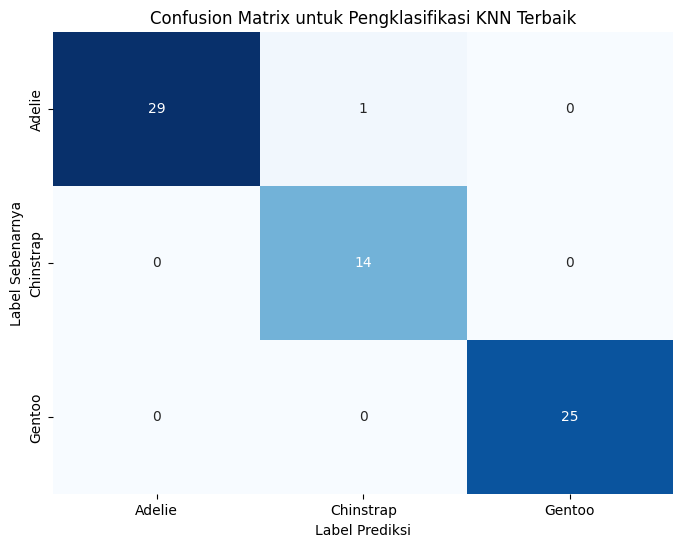

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Definisikan rentang nilai n_neighbors untuk dicari
param_grid = {'n_neighbors': list(range(1, 21))}

# Inisialisasi pengklasifikasi KNN
knn = KNeighborsClassifier()

# 3. Inisialisasi GridSearchCV dan sesuaikan dengan data pelatihan
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_processed, y_train)

# 4. Dapatkan model KNN terbaik
best_knn = grid_search.best_estimator_
print(f"n_neighbors terbaik ditemukan: {grid_search.best_params_['n_neighbors']}")

# 5. Buat prediksi pada data pengujian yang diproses menggunakan model terbaik
y_pred = best_knn.predict(X_test_processed)

# 6. Hitung dan cetak metrik evaluasi
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi dengan model KNN terbaik: {akurasi:.4f}")

print("\nLaporan Klasifikasi dengan model KNN terbaik:")
print(classification_report(y_test, y_pred))

# 7. Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix untuk Pengklasifikasi KNN Terbaik')
plt.show()

## Simpan Model dan Komponen Pra-pemrosesan

### Subtask:
Menyimpan model KNN terbaik yang telah terlatih dan objek-objek pra-pemrosesan (misalnya scaler, encoder) ke dalam file untuk digunakan di aplikasi Streamlit.


**Reasoning**:
To save the trained KNN model, LabelEncoder, StandardScaler, and the feature column names, I will use the `joblib` library to serialize each object to a file for later use in the Streamlit application.



In [9]:
import joblib

# Simpan model KNN terbaik yang terlatih
joblib.dump(best_knn, 'best_knn_model.joblib')
print("Model KNN terbaik disimpan sebagai 'best_knn_model.joblib'")

# Simpan objek LabelEncoder
joblib.dump(le, 'label_encoder.joblib')
print("LabelEncoder disimpan sebagai 'label_encoder.joblib'")

# Simpan objek StandardScaler
joblib.dump(scaler, 'scaler.joblib')
print("StandardScaler disimpan sebagai 'scaler.joblib'")

# Simpan nama kolom X (fitur) untuk pemesanan input yang konsisten di Streamlit
joblib.dump(X.columns.tolist(), 'feature_columns.joblib')
print("Nama kolom fitur disimpan sebagai 'feature_columns.joblib'")

Model KNN terbaik disimpan sebagai 'best_knn_model.joblib'
LabelEncoder disimpan sebagai 'label_encoder.joblib'
StandardScaler disimpan sebagai 'scaler.joblib'
Nama kolom fitur disimpan sebagai 'feature_columns.joblib'
